In [ ]:
"""
Program used to analyze 5-seconds windows with (signal, spikes) and selected optimal max interval parameters (which detect optimal bursts).

Input
----------
    - "data/datasets/{dataset}.h5" : 'dataset' containing measured MEA data
Output
----------
    - "data/training_data_info.dat" : file containing information about training data (points to h5 dataset files with recorded signal)
"""

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from helper import *

In [2]:
filename_output = 'data/training_data_info.dat'
f = open(filename_output, 'w+')
f.write('filename\twell\tchannel\trisingEdge\tmergedBurstIndex\tstartTime\tendTime\tparam1\tparam2\tparam3\tparam4\tparam5\n')
f.close()

In [3]:

filename = 'data/datasets/20220115_No_Group_E7.211228_B16119_5436_DIV18_001_Control_mwd.h5'
well = 2
channel = 2
signal = load_signal(filename, well, channel)
threshold = get_threshold(signal)
timestamp = [(i+1)/10000 for i in range(len(signal))]

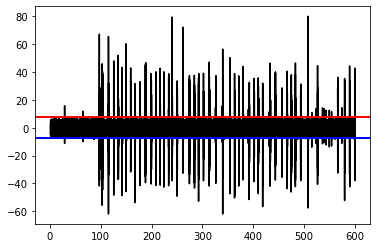

In [4]:
plotfrom = 1
plotto = 600

startplot = timestamp.index(plotfrom)
endplot = timestamp.index(plotto)
plt.plot(timestamp[startplot:endplot], signal[startplot:endplot], c = 'k')
plt.axhline(threshold, color =  'r', lw = 2)
plt.axhline(-threshold, color = 'b', lw = 2)
plt.show()

In [5]:
maxIntervalStartBurst =  15
maxIntervalEndBurst = 20       
minIntervalBetweenBursts = 25      
minDurationOfBurst = 20             
minSpikeCountInBurst = 5    

###

spikes, valid_bursts = get_spikes_and_bursts(signal, threshold, maxIntervalStartBurst, maxIntervalEndBurst, minIntervalBetweenBursts, minDurationOfBurst, minSpikeCountInBurst)
merged_bursts = merge_bursts(valid_bursts)

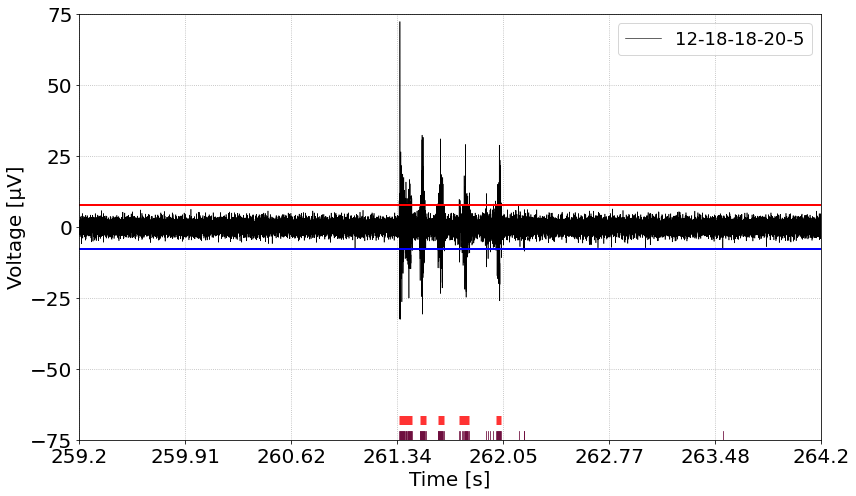

In [6]:
# choose train of bursts to analyze
burst_train_to_analyze = 18


maxIntervalStartBurst = 12
maxIntervalEndBurst = 18
minIntervalBetweenBursts = 18
minDurationOfBurst = 20         
minSpikeCountInBurst = 5 
# plot 
plot_burst_config(merged_bursts, burst_train_to_analyze, signal, threshold, maxIntervalStartBurst, maxIntervalEndBurst, minIntervalBetweenBursts, minDurationOfBurst, minSpikeCountInBurst, timestamp)

In [7]:
save_burst_and_params(filename_output, filename, signal, threshold, well, channel, burst_train_to_analyze, merged_bursts, timestamp, 
                      maxIntervalStartBurst, maxIntervalEndBurst, minIntervalBetweenBursts, minDurationOfBurst, minSpikeCountInBurst)